
Created on Thur Sep  14 00:25:54 2023
@author: Fernandez, Maria Giselle

Cite this work: Fernández-Godino, M. G. (2023). Review of multi-fidelity models. arXiv preprint arXiv:1609.07196.



# Multi-Fidelity Modeling Toy Problem 5: Multi-Fidelity Forrester Function 

This Python class encapsulates the functionalities related to the multi-fidelity Forrester function. It provides methods for function evaluation, plotting, and model training.

## Class Definition

### `MultiFidelityForrester`

A class for encapsulating the functionalities related to the multi-fidelity Forrester function.

#### Methods

##### `__init__(self, lb=0, ub=1, num_points=100)`

Initializes the class with default lower and upper bounds and the number of points.

- **Parameters:**
  - `lb` (float): Lower bound for function evaluation
  - `ub` (float): Upper bound for function evaluation
  - `num_points` (int): Number of linearly spaced points

##### `func_HF(self, x)`

Calculates the high-fidelity function \( f_{\text{HF}}(x) \).

- **Parameters:**
  - `x` (float): Input value
- **Returns:**
  - float: \( f_{\text{HF}}(x) \) value

##### `func_LF(self, x)`

Calculates the low-fidelity function \( f_{\text{LF}}(x) \).

- **Parameters:**
  - `x` (float): Input value
- **Returns:**
  - float: \( f_{\text{LF}}(x) \) value

##### `plot_functions(self)`

Plots both the high-fidelity and low-fidelity functions. Saves the plot as a high-resolution PNG file.

---

## Example Usage

```python
# Instantiate the class and plot the functions
if __name__ == '__main__':
    mf_forrester = MultiFidelityForrester()
    mf_forrester.plot_functions()
```

---

This documentation is intended to provide a clear and concise understanding of the `MultiFidelityForrester` class, its attributes, and its methods. The script also contains a test condition to instantiate the class and visualize the functions if it is the main program being run.

For a more extensive understanding of the algorithms used, refer to the in-line comments within the class methods.

---

In [4]:
# Required Libraries: Import the libraries essential for plotting and numerical operations.
import matplotlib.pyplot as plt
import numpy as np

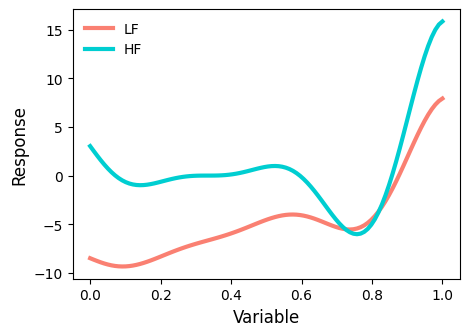

In [61]:
class MultiFidelityForrester:
    """
    This class encapsulates the functionalities related to the multi-fidelity Forrester function.
    It provides methods for high-fidelity and low-fidelity function evaluations and plotting.
    """
    
    def __init__(self, lb=0, ub=1, num_points=100):
        """
        Initialize the class with default lower and upper bounds and the number of points.
        
        Parameters:
        lb: float, lower bound for function evaluation
        ub: float, upper bound for function evaluation
        num_points: int, number of linearly spaced points
        """
        self.lb = lb
        self.ub = ub
        self.x = np.linspace(self.lb, self.ub, num_points)
    
    def func_HF(self, x):
        """
        High-fidelity function fHF(x)
        
        Parameters:
        x: float, input value
        
        Returns:
        float, fHF(x) value
        """
        return (6*x - 2)**2 * np.sin(12*x - 4)
    
    def func_LF(self, x):
        """
        Low-fidelity function fLF(x)
        
        Parameters:
        x: float, input value
        
        Returns:
        float, fLF(x) value
        """
        return 0.5 * self.func_HF(x) + 10 * (x - 0.5) - 5
    
    def plot_functions(self):
        """
        Plot both the high-fidelity and low-fidelity functions.
        
        Saves the plot as a high-resolution PNG file.
        """
        # Evaluate the High-Fidelity function (HF)
        fHF = self.func_HF(self.x)
        
        # Evaluate the Low-Fidelity function (LF)
        fLF = self.func_LF(self.x)
        
        # Initialize the figure for plotting
        plt.figure(figsize=[5, 3.5])
        
        # Plot the Low-Fidelity function (LF)
        plt.plot(self.x, fLF, c='salmon', linewidth=3, label='LF')
        
        # Plot the High-Fidelity function (HF)
        plt.plot(self.x, fHF, c='darkturquoise', linewidth=3, label='HF')
        
        # Configure plot parameters
        plt.legend(frameon=False)
        plt.xlabel('Variable', fontsize=12)
        plt.ylabel('Response', fontsize=12)
        
        # Save the plot
        plt.savefig('Function_Forrester.png', dpi=1000, bbox_inches='tight', transparent=True)

# Instantiate the class and plot the functions
if __name__ == '__main__':
    mf_forrester = MultiFidelityForrester()
    mf_forrester.plot_functions()


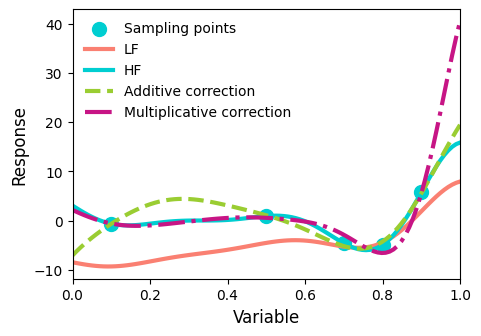

In [62]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np

class MultiFidelityForrester:
    """Class for encapsulating functionalities related to the multi-fidelity Forrester function."""
    
    def __init__(self, lb=0, ub=1, num_points=100):
        """Initialize variables and evaluate functions."""
        self.lb = lb
        self.ub = ub
        self.x = np.linspace(self.lb, self.ub, num_points)
        self.fHF = self.func_HF(self.x)
        self.fLF = self.func_LF(self.x)
        
    def func_HF(self, x):
        """High-fidelity function fHF(x)."""
        return (6*x - 2)**2 * np.sin(12*x - 4)
    
    def func_LF(self, x):
        """Low-fidelity function fLF(x)."""
        return 0.5 * self.func_HF(x) + 10 * (x - 0.5) - 5

    def fit_correction_models(self, x_sampHF):
        """Fit polynomial models for additive and multiplicative corrections."""
        self.model_add = np.poly1d(np.polyfit(x_sampHF, self.func_HF(x_sampHF) - self.func_LF(x_sampHF), deg=3))
        self.model_mult = np.poly1d(np.polyfit(x_sampHF, self.func_HF(x_sampHF) / self.func_LF(x_sampHF), deg=3))
    
    def func_add(self, x):
        """Additive correction function."""
        return self.model_add(x) + self.func_LF(x)
    
    def func_mult(self, x):
        """Multiplicative correction function."""
        return self.model_mult(x) * self.func_LF(x)
    
    def plot_functions(self):
        """Plot various functions, including corrections."""
        # Initialize the figure
        plt.figure(figsize=[5, 3.5])
        
        # Sampled points for High-Fidelity function
        x_sampHF = np.array([0.1, 0.5, 0.7, 0.8, 0.9])
        
        # Fit correction models
        self.fit_correction_models(x_sampHF)
        
        # Plot sampled HF points
        plt.scatter(x_sampHF, self.func_HF(x_sampHF), 100, c='darkturquoise', label='Sampling points')
        
        # Plot original LF and HF
        plt.plot(self.x, self.fLF, c='salmon', linewidth=3, label='LF')
        plt.plot(self.x, self.fHF, c='darkturquoise', linewidth=3, label='HF')
        
        # Plot additive and multiplicative correction
        plt.plot(self.x, self.func_add(self.x), '--', c='yellowgreen', linewidth=3, label='Additive correction')
        plt.plot(self.x, self.func_mult(self.x), '-.', c='mediumvioletred', linewidth=3, label='Multiplicative correction')
        
        # Configure plot
        plt.xlim([0, 1])
        plt.legend(frameon=False, fontsize=10)
        plt.xlabel('Variable', fontsize=12)
        plt.ylabel('Response', fontsize=12)
        
        # Save the plot
        plt.savefig('AddMult_Forrester.png', dpi=1000, bbox_inches='tight', transparent=True)
        
# Instantiate the class and plot the functions
if __name__ == '__main__':
    mf_forrester = MultiFidelityForrester()
    mf_forrester.plot_functions()


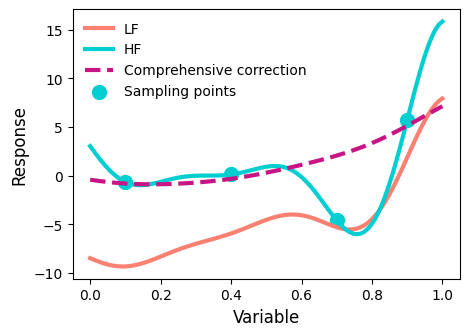

In [64]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np

class MultiFidelityForrester:
    """Class for encapsulating functionalities related to the multi-fidelity Forrester function."""
    
    def __init__(self, lb=0, ub=1, num_points=100):
        """Initialize variables and evaluate functions."""
        self.lb = lb
        self.ub = ub
        self.x = np.linspace(self.lb, self.ub, num_points)
        self.fHF = self.func_HF(self.x)
        self.fLF = self.func_LF(self.x)
        
    def func_HF(self, x):
        """High-fidelity function fHF(x)."""
        return (6*x - 2)**2 * np.sin(12*x - 4)
    
    def func_LF(self, x):
        """Low-fidelity function fLF(x)."""
        return 0.5 * self.func_HF(x) + 10 * (x - 0.5) - 5
    
    def func_X(self, x):
        """Build the design matrix for comprehensive model."""
        return np.array([self.func_LF(x), x, x**2]).T

    def func_coef(self, X, Y, W=1):
        """Compute the model coefficients using weighted least squares."""
        if np.mean(W) == 1:
            W = np.diag(np.ones(len(X)))
        return np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T).dot(W).dot(Y)

    def func_comprehensive(self, x, x_sampHF, W):
        """Comprehensive correction model based on HF samples."""
        X = self.func_X(x)
        Y = self.func_HF(x_sampHF)
        B = self.func_coef(self.func_X(x_sampHF), Y, W)
        return ((B[0]) * X[:, 0] + X[:, 1:].dot(B[1:].reshape(-1, 1)).T)[0]

    def plot_comprehensive(self, x_sampHF):
        """Plot HF, LF, and comprehensive models."""
        # Initialize the figure
        plt.figure(figsize=[5, 3.5])
        
        # Weight matrix based on HF and LF discrepancies
        W = np.diag(self.func_HF(x_sampHF) - self.func_LF(x_sampHF))
        
        # Plot existing LF and HF functions
        plt.plot(self.x, self.fLF, c='salmon', linewidth=3, label='LF')
        plt.plot(self.x, self.fHF, c='darkturquoise', linewidth=3, label='HF')
        
        # Plot the comprehensive correction model
        plt.plot(self.x, self.func_comprehensive(self.x, x_sampHF, W), '--', c='mediumvioletred', linewidth=3, label='Comprehensive correction')
        
        # Plot HF sampling points
        plt.scatter(x_sampHF, self.func_HF(x_sampHF), 100, c='darkturquoise', label='Sampling points')
        
        # Configure plot
        plt.legend(frameon=False)
        plt.xlabel('Variable', fontsize=12)
        plt.ylabel('Response', fontsize=12)
        
        # Save the plot
        plt.savefig('Comprehensive_Forrester.png', dpi=1000, bbox_inches='tight', transparent=True)

# Instantiate the class and plot the comprehensive model
if __name__ == '__main__':
    mf_forrester = MultiFidelityForrester()
    x_sampHF = np.array([0.1, 0.4, 0.7, 0.9])  # HF sampling points
    mf_forrester.plot_comprehensive(x_sampHF)


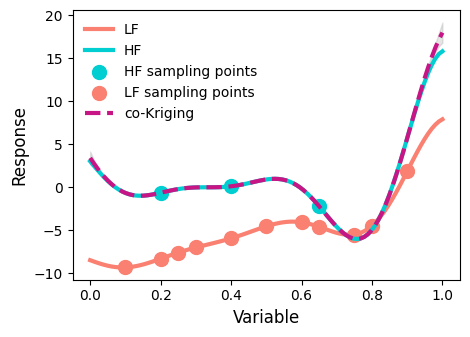

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from openmdao.surrogate_models.multifi_cokriging import MultiFiCoKriging as coKG

class MultiFidelityCoKrigingModel:
    """
    A class for conducting multi-fidelity analysis using co-Kriging models.
    """

    def __init__(self, func_HF, func_LF):
        """
        Initialize the MultiFidelityCoKrigingModel class.
        
        Parameters:
            func_HF: High-fidelity model function
            func_LF: Low-fidelity model function
        """
        self.func_HF = func_HF
        self.func_LF = func_LF
        self.ndmodel = coKG()
    
    def experiment_design(self, Xe, Xc):
        """
        Design the experiment by specifying the high-fidelity and low-fidelity sample points.
        
        Parameters:
            Xe: High-fidelity sample points
            Xc: Low-fidelity sample points
        """
        self.Xe = Xe
        self.Xc = Xc
        self.ye = self.func_HF(Xe)
        self.yc = self.func_LF(Xc)

    def train_model(self):
        """
        Train the co-Kriging model based on the experiment design.
        """
        self.ndmodel.fit([self.Xc, self.Xe], [self.yc, self.ye])
        
    def make_prediction(self, x):
        """
        Make a prediction using the trained co-Kriging model.
        
        Parameters:
            x: The points where prediction is required
            
        Returns:
            Predicted response and the corresponding standard deviation
        """
        return self.ndmodel.predict(x.reshape(-1, 1))

    def visualize(self, x, fLF, fHF):
        """
        Visualize the results.
        
        Parameters:
            x: Input values for plotting
            fLF: Low-fidelity function values for plotting
            fHF: High-fidelity function values for plotting
        """
        plt.figure(figsize=[5, 3.5])
        plt.plot(x, fLF, c='salmon', linewidth=3, label='LF')
        plt.plot(x, fHF, c='darkturquoise', linewidth=3, label='HF')
        plt.scatter(self.Xe, self.ye, 100, c='darkturquoise', label='HF sampling points')
        plt.scatter(self.Xc, self.yc, 100, c='salmon', label='LF sampling points')
        f_pred = self.make_prediction(x)
        plt.plot(x, f_pred[0], '--', c='mediumvioletred', linewidth=3, label='co-Kriging')
        plt.fill_between(x, (f_pred[0] - 2*f_pred[1]).reshape(len(x)), (f_pred[0] + 2*f_pred[1]).reshape(len(x)), color='gray', alpha=0.2)
        plt.legend(frameon=False)
        plt.xlabel('Variable', fontsize=12)
        plt.ylabel('Response', fontsize=12)
        plt.savefig('coKriging_Forrester.png', dpi=1000, bbox_inches='tight', transparent=True)


# Defining the Forrester functions outside the class
def func_HF(x):
    """High-fidelity function fHF(x)."""
    return (6*x - 2)**2 * np.sin(12*x - 4)

def func_LF(x):
    """Low-fidelity function fLF(x)."""
    return 0.5 * func_HF(x) + 10 * (x - 0.5) - 5

# Create instance of the class
mfck_model = MultiFidelityCoKrigingModel(func_HF, func_LF)

# Experiment design points
Xe = np.array([[0.2], [0.4], [0.65]])  # For HF model
Xc = np.vstack((np.array([[0.1], [0.25], [0.3], [0.5], [0.6], [0.75], [0.8], [0.9]]), Xe))  # For LF model

# Train the model
mfck_model.experiment_design(Xe, Xc)
mfck_model.train_model()

# Generate data for plotting
x = np.linspace(0, 1, 100)
fHF = func_HF(x)
fLF = func_LF(x)

# Visualize the model
mfck_model.visualize(x, fLF, fHF)


Certainly. Below is the Markdown-based documentation of the Python classes you provided, each detailing their purpose, methods, and example usage.

---

# Branin Function Documentation

## BraninFunctionPlot Class

### Overview

The `BraninFunctionPlot` class serves the purpose of plotting High-Fidelity (HF) and Low-Fidelity (LF) Branin functions.

### Methods

#### `__init__(self)`

Initializes Branin function parameters.

#### `func_HF(self, x, y)`

Computes the HF function based on the Branin function.

- **Parameters:**
  - `x` (float): The x-coordinate
  - `y` (float): The y-coordinate
- **Returns:**
  - float: The value of HF function

#### `func_LF(self, x, y)`

Computes the LF function derived from the HF function.

- **Parameters:**
  - `x` (float): The x-coordinate
  - `y` (float): The y-coordinate
- **Returns:**
  - float: The value of LF function

#### `plot_functions(self)`

Generates and saves plots for both HF and LF functions.

---

## BraninFunctionModeling Class

### Overview

The `BraninFunctionModeling` class focuses on fitting additive and multiplicative models to HF and LF functions.

### Methods

#### `__init__(self)`

Initializes the polynomial features and linear regression models.

#### `func_HF(self, x, y)`

Computes the HF function based on the Branin function.

#### `func_LF(self, x, y)`

Computes the LF function derived from the HF function.

#### `fit_models(self, X_sampHF)`

Fits additive and multiplicative models based on sampled points from the HF function.

- **Parameters:**
  - `X_sampHF` (array): The sampled points from the HF function.

#### `plot_models(self)`

Generates plots for the additive and multiplicative models along with their Mean Absolute Percentage Errors (MAPE).

---

## BraninScatterPlot Class

### Overview

The `BraninScatterPlot` class plots scatter plots of HF and LF functions.

### Methods

#### `__init__(self, x_sampHF, y_sampHF)`

Initializes with the sampled points for the HF model.

- **Parameters:**
  - `x_sampHF` (array): The x-coordinates for the sampled points
  - `y_sampHF` (array): The y-coordinates for the sampled points

#### `func_HF(self, x, y)`

Computes the HF function based on the Branin function.

#### `func_LF(self, x, y)`

Computes the LF function derived from the HF function.

#### `plot_scatter(self)`

Generates scatter plots for LF and HF models with varying sizes based on the HF/LF ratio.

---

### Example Usage

```python
# For BraninFunctionPlot
branin_plotter = BraninFunctionPlot()
branin_plotter.plot_functions()

# For BraninFunctionModeling
model = BraninFunctionModeling()
model.fit_models(X_sampHF)
model.plot_models()

# For BraninScatterPlot
plotter = BraninScatterPlot(x_sampHF, y_sampHF)
plotter.plot_scatter()
```

---

This documentation aims to offer a precise yet comprehensive understanding of the functionalities each class provides. For more nuanced details, consult the in-line comments within the class methods.

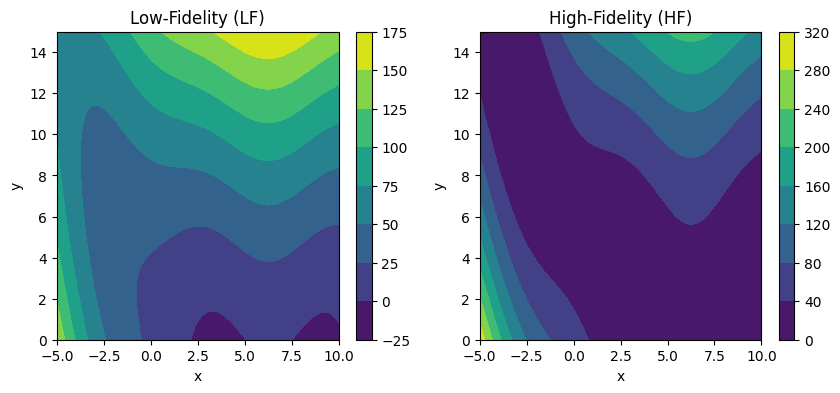

In [77]:
import numpy as np
import matplotlib.pyplot as plt

class BraninFunctionPlot:
    def __init__(self):
        """Initialize the class with the Branin function parameters."""
        self.a = 1
        self.b = 5.1 / (4 * np.pi ** 2)
        self.c = 5 / np.pi
        self.r = 6
        self.s = 10
        self.t = 1 / (8 * np.pi)

    def func_HF(self, x, y):
        """High-fidelity function (HF) based on the Branin function."""
        return self.a * (y - self.b * x ** 2 + self.c * x - self.r) ** 2 + self.s * (1 - self.t) * np.cos(x) + self.s

    def func_LF(self, x, y):
        """Low-fidelity function (LF) derived from the high-fidelity function."""
        return 0.5 * self.func_HF(x, y) + 5 * (y - 0.5) - 5

    def plot_functions(self):
        """Generate plots for both HF and LF functions."""
        
        # Generate a meshgrid for evaluation points
        x = np.linspace(-5, 10, 100)
        y = np.linspace(0, 15, 100)
        X, Y = np.meshgrid(x, y)
        
        # Evaluate the high-fidelity (HF) function
        Z_HF = self.func_HF(X, Y)
        
        # Evaluate the low-fidelity (LF) function
        Z_LF = self.func_LF(X, Y)
        
        # Initialize a figure for plotting
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 4])
        
        # Plot the low-fidelity (LF) function
        cp1 = ax1.contourf(X, Y, Z_LF, cmap='viridis')
        ax1.set_title('Low-Fidelity (LF)')
        plt.colorbar(cp1, ax=ax1)
        
        # Plot the high-fidelity (HF) function
        cp2 = ax2.contourf(X, Y, Z_HF, cmap='viridis')
        ax2.set_title('High-Fidelity (HF)')
        plt.colorbar(cp2, ax=ax2)
        
        # Configure axes labels
        for ax in [ax1, ax2]:
            ax.set_xlabel('x')
            ax.set_ylabel('y')
        
        # Save the plot as a high-resolution PNG file
        plt.savefig('Branin_Function.png', dpi=1000, bbox_inches='tight', transparent=True)

# Instantiate the class and plot the functions
if __name__ == '__main__':
    branin_plotter = BraninFunctionPlot()
    branin_plotter.plot_functions()


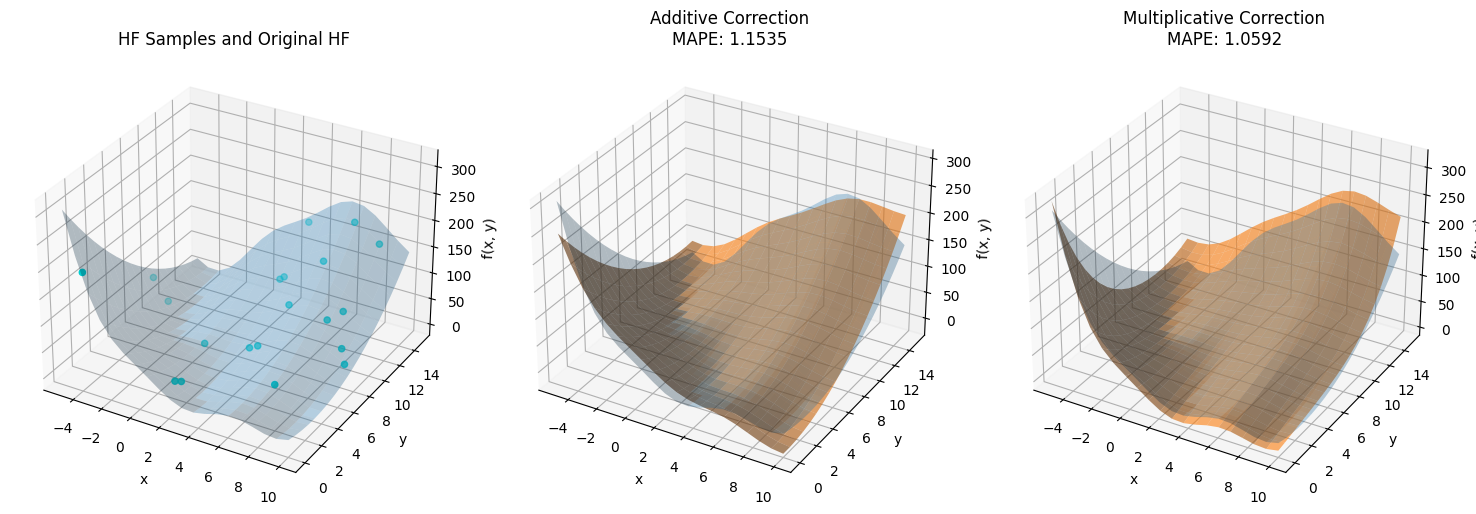

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_absolute_percentage_error
import math

class BraninFunctionModeling:
    def __init__(self):
        """Initialize parameters and models."""
        self.poly = PolynomialFeatures(degree=2)
        self.model_add = LinearRegression()
        self.model_mult = LinearRegression()

    def func_HF(self, x, y):
        """High-fidelity function (HF) based on the Branin function."""
        # Define Branin parameters
        a = 1
        b = 5.1 / (4 * np.pi ** 2)
        c = 5 / np.pi
        r = 6
        s = 10
        t = 1 / (8 * np.pi)
        return a * (y - b * x ** 2 + c * x - r) ** 2 + s * (1 - t) * np.cos(x) + s

    def func_LF(self, x, y):
        """Low-fidelity function (LF) derived from the high-fidelity function."""
        return 0.5 * self.func_HF(x, y) + 5 * (y - 0.5) - 5

    def fit_models(self, X_sampHF):
        """Fit additive and multiplicative models based on sampled points."""
        x_sampHF, y_sampHF = X_sampHF[:, 0], X_sampHF[:, 1]
        X_poly = self.poly.fit_transform(X_sampHF)
        
        delta = self.func_HF(x_sampHF, y_sampHF) - self.func_LF(x_sampHF, y_sampHF)
        self.model_add.fit(X_poly, delta)
        
        ratio = self.func_HF(x_sampHF, y_sampHF) / self.func_LF(x_sampHF, y_sampHF)
        self.model_mult.fit(X_poly, ratio)

    def plot_models(self):
        """Generate plots for the models and their corrections."""
        # Create grid
        x_grid, y_grid = np.meshgrid(np.linspace(-5, 10, 20), np.linspace(0, 15, 20))
        X_grid = np.column_stack((x_grid.ravel(), y_grid.ravel()))
        X_poly_grid = self.poly.transform(X_grid)

        delta_grid = self.model_add.predict(X_poly_grid)
        ratio_grid = self.model_mult.predict(X_poly_grid)

        Z_add = self.func_LF(x_grid, y_grid) + delta_grid.reshape(x_grid.shape)
        Z_mult = self.func_LF(x_grid, y_grid) * ratio_grid.reshape(x_grid.shape)
        Z_HF = self.func_HF(x_grid, y_grid)

        rmse_add = math.sqrt(mean_absolute_percentage_error(Z_HF.ravel(), Z_add.ravel()))
        rmse_mult = math.sqrt(mean_absolute_percentage_error(Z_HF.ravel(), Z_mult.ravel()))

        fig = plt.figure(figsize=[15, 5])

        ax1 = fig.add_subplot(131, projection='3d')
        ax1.scatter(X_sampHF[:, 0], X_sampHF[:, 1], self.func_HF(X_sampHF[:, 0], X_sampHF[:, 1]), c='darkturquoise', label='HF Samples')
        ax1.plot_surface(x_grid, y_grid, Z_HF, alpha=0.3)
        ax1.set_title('HF Samples and Original HF')
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.set_zlabel('f(x, y)')

        ax2 = fig.add_subplot(132, projection='3d')
        ax2.plot_surface(x_grid, y_grid, Z_HF, alpha=0.3)
        ax2.plot_surface(x_grid, y_grid, Z_add, alpha=0.6)
        ax2.set_title(f'Additive Correction\nMAPE: {rmse_add:.4f}')
        ax2.set_xlabel('x')
        ax2.set_ylabel('y')
        ax2.set_zlabel('f(x, y)')

        ax3 = fig.add_subplot(133, projection='3d')
        ax3.plot_surface(x_grid, y_grid, Z_HF, alpha=0.3)
        ax3.plot_surface(x_grid, y_grid, Z_mult, alpha=0.6)
        ax3.set_title(f'Multiplicative Correction\nMAPE: {rmse_mult:.4f}')
        ax3.set_xlabel('x')
        ax3.set_ylabel('y')
        ax3.set_zlabel('f(x, y)')

        plt.tight_layout()
        # Save the plot as a high-resolution PNG file
        plt.savefig('3D_Branin_Function_Correction_plots.png', dpi=1000, bbox_inches='tight', transparent=True)
        plt.show()

if __name__ == '__main__':
    np.random.seed(0)
    x_sampHF = np.random.uniform(-5, 10, 20)
    y_sampHF = np.random.uniform(0, 15, 20)
    X_sampHF = np.column_stack((x_sampHF, y_sampHF))

    model = BraninFunctionModeling()
    model.fit_models(X_sampHF)
    model.plot_models()


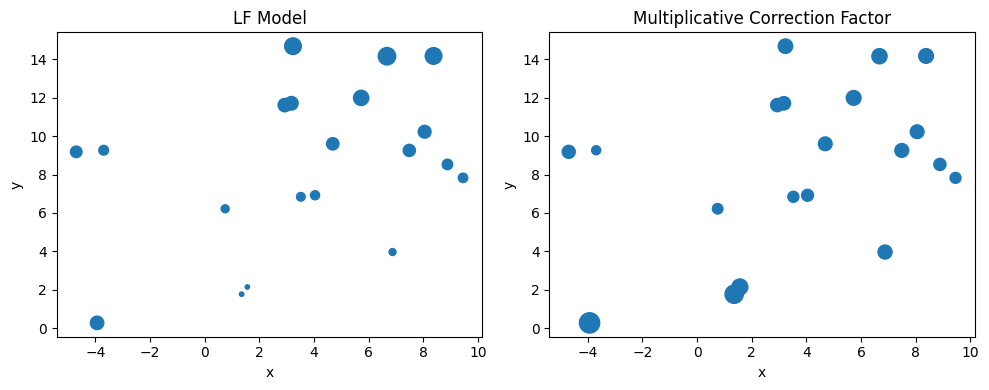

In [87]:
import matplotlib.pyplot as plt
import numpy as np

class BraninScatterPlot:
    def __init__(self, x_sampHF, y_sampHF):
        """Initialize with the sampled points for the High-Fidelity model."""
        self.x_sampHF = x_sampHF
        self.y_sampHF = y_sampHF

    def func_HF(self, x, y):
        """High-fidelity function (HF) based on the Branin function."""
        # Branin parameters
        a, b, c, r, s, t = 1, 5.1 / (4 * np.pi ** 2), 5 / np.pi, 6, 10, 1 / (8 * np.pi)
        return a * (y - b * x ** 2 + c * x - r) ** 2 + s * (1 - t) * np.cos(x) + s

    def func_LF(self, x, y):
        """Low-fidelity function (LF) derived from the high-fidelity function."""
        return 0.5 * self.func_HF(x, y) + 5 * (y - 0.5) - 5

    def plot_scatter(self):
        """Plot LF and HF models as scatter plots with varying sizes."""
        plt.figure(figsize=(10, 4))

        # Plot LF function
        plt.subplot(1, 2, 1)
        plt.scatter(self.x_sampHF, self.y_sampHF, self.func_LF(self.x_sampHF, self.y_sampHF))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('LF Model')

        # Plot HF function with size scaled to HF/LF ratio
        plt.subplot(1, 2, 2)
        size_factor = 100 * self.func_HF(self.x_sampHF, self.y_sampHF) / self.func_LF(self.x_sampHF, self.y_sampHF)
        plt.scatter(self.x_sampHF, self.y_sampHF, s=size_factor)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Multiplicative Correction Factor')

        plt.tight_layout()
        # Save the plot as a high-resolution PNG file
        plt.savefig('Multiplicative_factor_quotient_study.png', dpi=1000, bbox_inches='tight', transparent=True)
        plt.show()

if __name__ == '__main__':
    np.random.seed(0)
    x_sampHF = np.random.uniform(-5, 10, 20)
    y_sampHF = np.random.uniform(0, 15, 20)
  
    plotter = BraninScatterPlot(x_sampHF, y_sampHF)
    plotter.plot_scatter()
